In [1]:
using DifferentialEquations
using Plots

In [2]:
# Function to compute running maximum over ensemble of solutions
function running_max!(sol::EnsembleSolution)
    for i=1:length(sol)
        for j=2:length(sol[i].u)
            sol[i].u[j] = max(sol[i].u[j-1], sol[i].u[j])
        end
    end
end

running_max! (generic function with 1 method)

In [31]:
Tmax = 10.0;
DTYPE = Float32;

μ = 1;
σ = 1;
x0 = -1;

# Varying variance
mc_prob_var = MonteCarloProblem(SDEProblem(
               (u,p,t) -> -μ*u,         # bias
               (u,p,t) -> σ*min(1,1.5*t),  # variance
               DTYPE(x0),                 # initial condition
               (DTYPE(0), DTYPE(Tmax))   # time interval
             ));
sol_var = solve(mc_prob_var, num_monte=1000);

# Constant variance
mc_prob = MonteCarloProblem(SDEProblem(
            (u,p,t) -> -μ*u,       # bias
            (u,p,t) -> σ,          # variance
            DTYPE(x0),             # initial condition
            (DTYPE(0), DTYPE(Tmax)) # time interval
          ));
sol = solve(mc_prob, num_monte=1000);

In [32]:
running_max!(sol)
running_max!(sol_var)

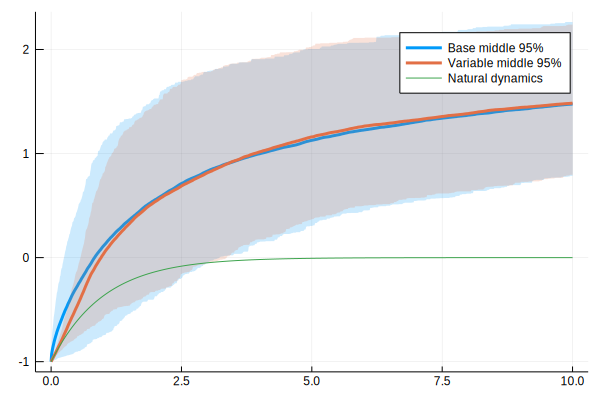

In [33]:
plot(MonteCarloSummary(sol,0:0.01:Tmax), labels="Base middle 95%")
plot!(MonteCarloSummary(sol_var,0:0.01:Tmax), labels="Variable middle 95%", legend=true)
tt = range(0, Tmax, length=200)
yy = exp.(-mu*tt)*x0
plot!(tt, yy, labels="Natural dynamics")